In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16417,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

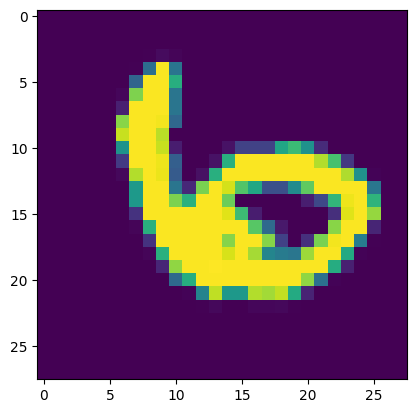

In [7]:
plt.imshow(df.iloc[7153,1:].values.reshape(28,28))

In [8]:
df.sample(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1846,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


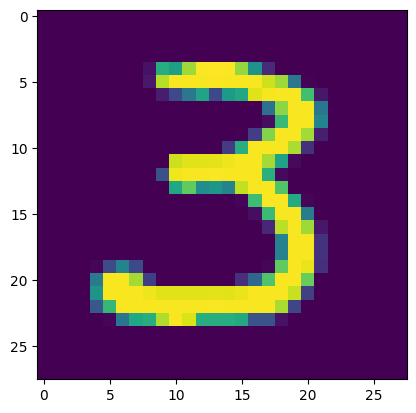

In [9]:
plt.imshow(df.iloc[35891,1:].values.reshape(28,28))

In [10]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
X.shape

(42000, 784)

In [13]:
type(Y)

pandas.core.series.Series

In [14]:
Y.shape

(42000,)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(33600, 784)

In [17]:
X_test.shape

(8400, 784)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier()

In [20]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [21]:
import time
start=time.time()
y_pred=knn.predict(X_test)
time.time()-start

14.256651878356934

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9648809523809524

# Now applying PCA :-

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sd=scaler.fit_transform(X_train)
X_test_sd=scaler.transform(X_test)

In [25]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train_trf=pca.fit_transform(X_train_sd)
X_test_trf=pca.transform(X_test_sd)

In [27]:
X_train_trf.shape

(33600, 100)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_trf,Y_train)

KNeighborsClassifier()

In [29]:
import time
start=time.time()
y_pred_1=knn.predict(X_test_trf)
time.time()-start

2.0267393589019775

In [30]:
accuracy_score(Y_test,y_pred_1)

0.9546428571428571

**Wow !! what a nice differece by using PCA it only takes approx 2 sec in comparision to without PCA which takes approx 11 sec**

In [31]:
for i in range(1,18):
    pca=PCA(n_components=i)
    scaler=StandardScaler()
    
    X_train_sd=scaler.fit_transform(X_train)
    X_test_sd=scaler.transform(X_test)
    
    X_train_trf=pca.fit_transform(X_train_sd)
    X_test_trf=pca.transform(X_test_sd)
    
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,Y_train)
    

    start=time.time()
    y_pred=knn.predict(X_test_trf)
    duration=time.time()-start
    
    print(f"for n_component={i} :")
    print(f"accuracy_score :{accuracy_score(Y_test,y_pred)}  Time taken :{duration}")

for n_component=1 :
accuracy_score :0.2577380952380952  Time taken :0.5965161323547363
for n_component=2 :
accuracy_score :0.3238095238095238  Time taken :0.5694582462310791
for n_component=3 :
accuracy_score :0.5105952380952381  Time taken :0.5966792106628418
for n_component=4 :
accuracy_score :0.6661904761904762  Time taken :0.6120469570159912
for n_component=5 :
accuracy_score :0.7379761904761905  Time taken :0.6813750267028809
for n_component=6 :
accuracy_score :0.8227380952380953  Time taken :0.7639610767364502
for n_component=7 :
accuracy_score :0.8436904761904762  Time taken :0.9089093208312988
for n_component=8 :
accuracy_score :0.8722619047619048  Time taken :1.2217156887054443
for n_component=9 :
accuracy_score :0.8869047619047619  Time taken :1.3547165393829346
for n_component=10 :
accuracy_score :0.9046428571428572  Time taken :1.6122264862060547
for n_component=11 :
accuracy_score :0.911547619047619  Time taken :1.8497569561004639
for n_component=12 :
accuracy_score :0.917

# Lets visualize the data in 2d plot :-

In [32]:
#Transforming data to a 2d coordinate system 
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train_sd)
X_test_trf=pca.transform(X_test_sd)

In [33]:
X_train_trf.shape

(33600, 2)

In [34]:
X_train_trf

array([[-2.71866837, -0.48964034],
       [-0.67683629, -6.75441125],
       [-3.03329798,  6.5103151 ],
       ...,
       [ 2.14887905,  0.7809084 ],
       [ 1.0594763 ,  0.94814207],
       [17.70258591,  1.96144822]])

In [38]:
import plotly.express as px

Y_train_trf = Y_train.astype(str)

fig = px.scatter(x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 color=Y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Lets visualize the data in 3d plot :-

In [39]:
#Transforming data to a 3d coordinate system 
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train_sd)
X_test_trf=pca.transform(X_test_sd)

In [40]:
X_train_trf.shape

(33600, 3)

In [41]:
X_train_trf

array([[-2.71863885, -0.48957164,  1.13517911],
       [-0.67694427, -6.75435905, -2.33522066],
       [-3.03322522,  6.50985111,  7.49218939],
       ...,
       [ 2.14884894,  0.78054167, -0.74733483],
       [ 1.05954351,  0.94822075,  3.94907781],
       [17.70256759,  1.96175414, -4.94369989]])

In [43]:
import plotly.express as px

Y_train_trf = Y_train.astype(str)

fig = px.scatter_3d(
                 x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 z=X_train_trf[:, 2],
                 color=Y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.update_layout(
    margin=dict(l=20 ,r=20 , t=20 ,b=20)
    )

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [44]:
pca.explained_variance_
#eigen values

array([40.67111198, 29.17023392, 26.74459603])

In [46]:
pca.components_
#eigen vectors

array([[ 5.06675709e-18,  4.44100372e-20,  7.95685641e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.77545191e-17,  7.59875810e-20,  8.38834811e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.12483569e-18, -4.57361323e-18, -6.88607526e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [47]:
pca.components_.shape

(3, 784)

In [52]:
pca.explained_variance_ratio_ #means 5% , 4% ,3.8%

array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train_sd)
X_test_trf=pca.transform(X_test_sd)

In [54]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [55]:
pca.explained_variance_ratio_.shape

(784,)

In [56]:
pca.components_

array([[-1.50074992e-19,  2.77555756e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20, -1.38777878e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -1.38777878e-17, -4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  6.77518817e-03,  7.97715344e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.81666233e-01,  1.25121896e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -2.74532268e-02,  9.16883896e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [58]:
pca.components_.shape

(784, 784)

In [59]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

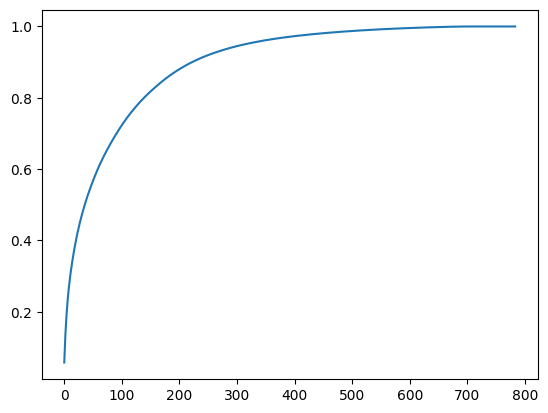

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))